$$\texttt{Реализуйте метод одномерного поиска (метод дихотомии)}$$

1.9990234375


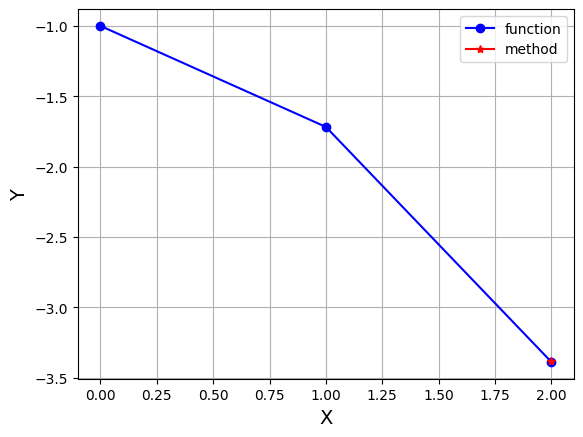

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt

def function(x):
    return x ** 2 - math.pow(math.e, x)

def find(a, b, isMin, eps):
    x = a
    while True:
        m = (x + b) / 2
        f1 = function(m - eps)
        f2 = function(m + eps)
        if (isMin):
            if (f1 < f2):
                b = m
            else:
                x = m
        else:
            if (f1 < f2):
                x = m
            else:
                b = m
        if (b - x <= eps):
            break

    return x

table = {'X': [], 'Y': []}
tableDot = {'X': [], 'Y': []}

a = 0
b = 2
eps = 0.001

found = find(a, b, True, eps)
tableDot['X'].append(found)
tableDot['Y'].append(function(found))

for i in range(a, b + 1):
    table['X'].append(i)
    table['Y'].append(function(i))

df = pd.DataFrame(table)
dd = pd.DataFrame(tableDot)

plt.plot(df['X'], df['Y'], color = 'blue', label = 'function', marker = 'o')
plt.plot(dd['X'], dd['Y'], color = 'red', label = 'method', marker = '*')

plt.xlabel('X', fontsize = 14)
plt.ylabel('Y', fontsize = 14)
plt.grid(True)
plt.legend()

# plt.show()
plt.savefig('example-dichotomy.svg')
print(find(a, b, True, eps))


$$\texttt{Градиентный спуск на основе метода одномерного поиска (метод дихотомии)}$$

In [2]:
import numpy

# x^2 + (x - y)^2

# l = [-5.0, -5.0]
# r = [5.0, 5.0]

k = 1000
alpha = 0.001
eps = 0.01

x0 = [2.0, 2.0]
points = [x0]

def function(p):
    return p[0] ** 2 + (p[0] - p[1]) ** 2

def nabla(p):
    return [(2 * p[0] + 2 * (p[0] - p[1])), (-2 * (p[0] - p[1]))]

def find(l, r):
    global eps
    x = l

    while True:
        m = [0.] * 2
        for dim in range(0, 2):
            m[dim] = (x[dim] + r[dim]) / 2

        f1 = function([m[0] + eps, m[1] + eps])
        f2 = function([m[0] - eps, m[1] - eps])

        if abs(f1 - f2) <= eps:
            x = m
        else:
            r = m
        
        t = [0.] * 2
        for dim in range(0, 2):
            t[dim] = abs(x[dim] - r[dim])

        if t[0] <= eps and t[1] <= eps:
            break
    
    return x

def descent():
    global points, x0

    for i in range(1, k + 1):
        points.append([0.] * 2)
        t = nabla(x0)
        for dim in range(0, 2):
            points[i][dim] = points[i - 1][dim] - alpha * t[dim]
        x0 = find(points[i - 1], x0)

descent()

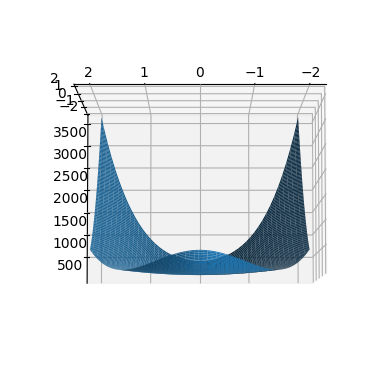

1000
[0.80286016 0.64369902] 0.03894251322769121


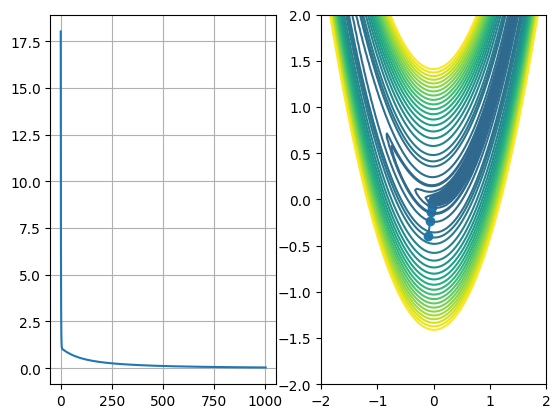

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import rosen, rosen_der

def dichotomy(a, b, eps):
    while True:
        x = (a + b) / 2
        x1 = x - eps
        x2 = x + eps
        if f(x1) <= f(x2):
            b = x
        else:
            a = x

        if np.linalg.norm(a - b) / 2 < eps:
            break

    return (a + b) / 2


def gradient_descent(x0, lr, eps, max_iter):
    x = np.copy(x0)
    points = np.array([x])

    for i in range(max_iter + 1):
        grad_res = grad(x)

        if np.all(np.abs(lr * grad_res) <= eps):
            break

        x1 = x - lr * grad_res

        x = dichotomy(x, x1, eps)

        points = np.vstack([points, x])

    print(i)
    return points


def grad(x):
    return rosen_der(x)


def f(x):
    return rosen(x)


x = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, x)
ax = plt.subplot(111, projection='3d')
ax.view_init(elev=-5, azim=90)
ax.plot_surface(X, Y, f(np.stack((X, Y))))
plt.show()
# plt.savefig("example-dichotomy-with-gradient.svg", dpi = 2048)

x0 = np.array([-0.1, -0.4])
lr = 0.002
eps = 1e-4
max_iter = 1000

result = gradient_descent(x0, lr, eps, max_iter)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(f(result.T))
ax1.grid()
ax2.plot(result[:, 0], result[:, 1], 'o-')
ax2.contour(X, Y, f(np.stack((X, Y))), levels=np.sort(np.concatenate((f(result.T), np.linspace(-100, 200, 30)))))
print(result[-1], f(result[-1]))
